In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
import io

In [37]:
from google.colab import files
uploaded = files.upload()

Saving ERIE.csv to ERIE.csv


In [38]:
df = pd.read_csv(io.BytesIO(uploaded['ERIE.csv']))
print(df)

          Date        Open        High         Low       Close   Adj Close  \
0     2/8/2023  245.800003  248.119995  244.919998  245.600006  241.040756   
1     2/9/2023  246.899994  248.039993  238.699997  238.699997  234.268860   
2    2/10/2023  239.869995  242.009995  237.660004  240.970001  236.496719   
3    2/13/2023  241.050003  245.970001  240.389999  243.860001  239.333069   
4    2/14/2023  243.050003  244.800003  236.919998  238.160004  233.738892   
..         ...         ...         ...         ...         ...         ...   
246   2/1/2024  343.630005  346.989990  337.579987  346.989990  346.989990   
247   2/2/2024  347.519989  348.829987  339.779999  347.390015  347.390015   
248   2/5/2024  346.359985  346.570007  343.160004  343.609985  343.609985   
249   2/6/2024  344.989990  348.339996  343.750000  347.489990  347.489990   
250   2/7/2024  348.079987  350.630005  346.070007  350.000000  350.000000   

        Average  
0    245.096152  
1    241.321768  
2    239.

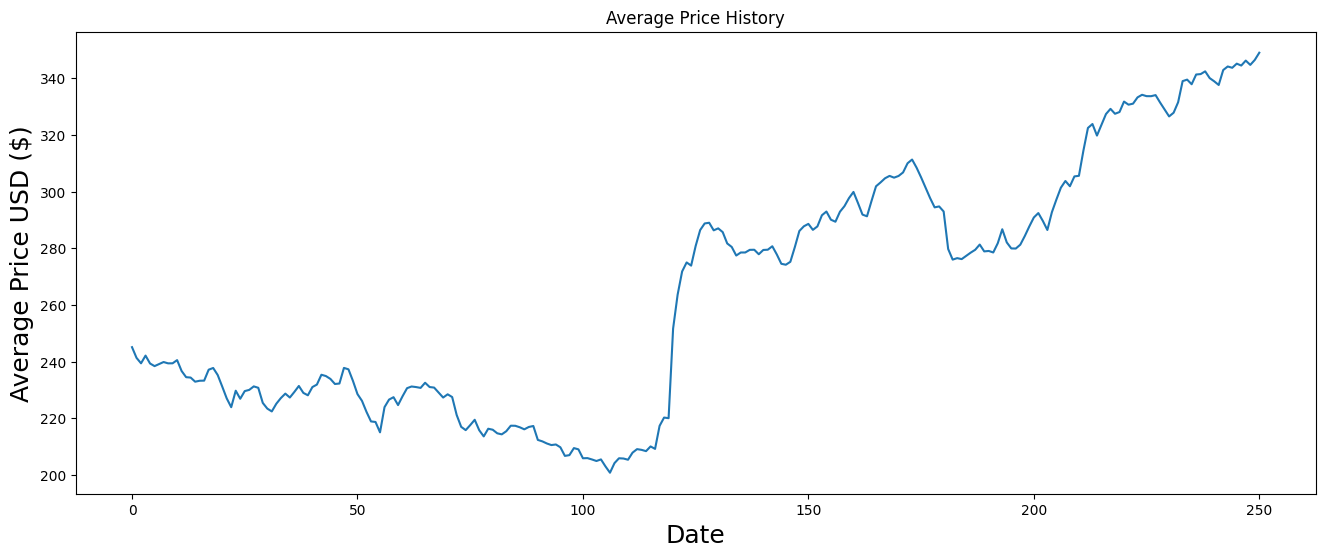

In [39]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [40]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

239

In [41]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 251


array([[-0.44486359],
       [-0.53133191],
       [-0.57532743],
       [-0.51303093],
       [-0.57687524],
       [-0.59803652],
       [-0.58175807],
       [-0.56498785],
       [-0.57566665],
       [-0.57528485],
       [-0.54947992],
       [-0.63746306],
       [-0.68746199],
       [-0.69054468],
       [-0.723857  ],
       [-0.71631172],
       [-0.71531035],
       [-0.62691039],
       [-0.61313645],
       [-0.66968095],
       [-0.76267955],
       [-0.85851859],
       [-0.92999397],
       [-0.7968116 ],
       [-0.86182082],
       [-0.79984578],
       [-0.79004244],
       [-0.76190386],
       [-0.77317287],
       [-0.89541216],
       [-0.94126179],
       [-0.96427396],
       [-0.90209778],
       [-0.85663596],
       [-0.82031918],
       [-0.85185982],
       [-0.80678965],
       [-0.7584911 ],
       [-0.81440456],
       [-0.83385695],
       [-0.767336  ],
       [-0.74728487],
       [-0.66777867],
       [-0.67829087],
       [-0.70152082],
       [-0

In [42]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-0.44486359, -0.53133191, -0.57532743, -0.51303093, -0.57687524,
       -0.59803652, -0.58175807, -0.56498785, -0.57566665, -0.57528485,
       -0.54947992, -0.63746306, -0.68746199, -0.69054468, -0.723857  ,
       -0.71631172, -0.71531035, -0.62691039, -0.61313645, -0.66968095,
       -0.76267955, -0.85851859, -0.92999397, -0.7968116 , -0.86182082,
       -0.79984578, -0.79004244, -0.76190386, -0.77317287, -0.89541216,
       -0.94126179, -0.96427396, -0.90209778, -0.85663596, -0.82031918,
       -0.85185982, -0.80678965, -0.7584911 , -0.81440456, -0.83385695,
       -0.767336  , -0.74728487, -0.66777867, -0.67829087, -0.70152082,
       -0.74242603, -0.73871802, -0.6125477 , -0.62385236, -0.71762155,
       -0.82399733, -0.87875163, -0.96763819, -1.04499357, -1.04936974,
       -1.13314325, -0.92959658, -0.86866612, -0.84910956, -0.91290193])]

 y_train [-0.8413922287844751]

x_train [array([-0.44486359, -0.53133191, -0.57532743, -0.51303093, -0.57687524,
       -0.5

In [43]:
print(x_train.shape[1])

60


In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [45]:
import tensorflow as tf

In [46]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 60, 256)           133120    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
6/6 [==============================] - 9s 224ms/step - loss: 0.4722
Epoch 2/50
6/6 [==============================] - 2s 422ms/step - loss: 0.1385
Epoch 3/50
6/6 [==============================] - 2s 227ms/step - loss: 0.0876
Epoch 4/50
6/6 [==============================] - 1s 232ms/step - loss: 0.0628
Epoch 5/50
6/6 [==============================] - 1s 231ms/step - loss: 0.0434
Epoch 6/50
6/6 [==============================] - 1s 228ms/step - loss: 0.0387
Epoch 7/50
6/6 [==============================] - 1s 227ms/step - loss: 0.0328
Epoch 8/50
6/6 [==============================] - 1s 229ms/step - loss: 0.0313
Epoch 9/50
6/6 [==============================] - 1s 231ms/step - loss: 0.0286
Epoch 10/50
6/6 [==============================] - 2s 395ms/step - loss: 0.0303
Epoch 11/50
6/6 [==============================] - 2s 253ms/step - loss: 0.0265
Epoch 12/50
6/6 [==============================] - 1s 233ms/step - loss: 0.0250
Epoch 13/50
6/6 [==============================] 

In [48]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  72
1/1 [==============================] - 2s 2s/step


7.641721599698879

<ipython-input-49-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


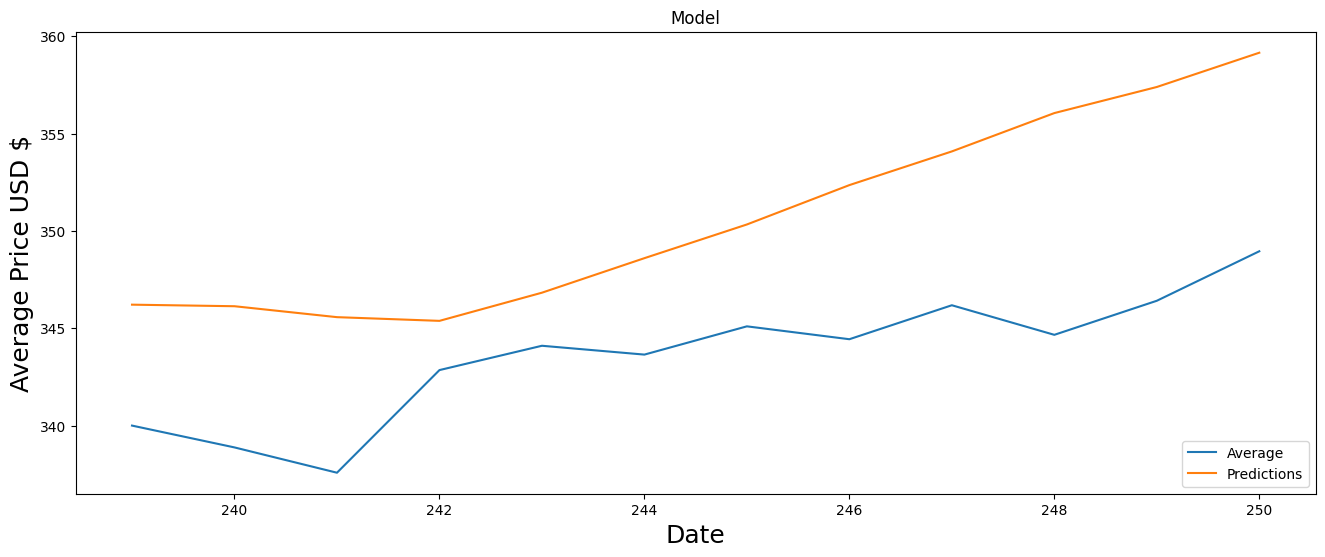

In [49]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [50]:
test[:]

,Average,Predictions
239,339.998004,346.211853
240,338.875995,346.131439
241,337.576001,345.569885
242,342.850006,345.379730
243,344.100006,346.826874
244,343.646002,348.601227
245,345.097998,350.332611
246,344.435992,352.355682
247,346.182001,354.086670
248,344.661993,356.056641
